# Exploratory Data Analysis (EDA) for ML

<div class="objectives">  
### Objectives

- Introduce some of the key packages for EDA and ML.
- Introduce and explore an dataset for ML
- Clean up a dataset
- Install additional Python libraries
</div>


First, let’s load the required libraries. We will use the sklearn library for our ML tasks, and the pandas, numpy, matplotlib seaborn and upsetplot libraries for general data processing and visualisation.

In [1]:
# Disable some warnings produced by pandas etc.
# (Don't do this in your actual analyses!)
import warnings
warnings.simplefilter('ignore', category=UserWarning)
warnings.simplefilter('ignore', category=FutureWarning)
warnings.simplefilter('ignore', category=RuntimeWarning)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection

#You probably do not have this library! Install it with pip:
#!pip install UpSetPlot
import upsetplot
%matplotlib inline
sns.set(font_scale = 1.5)

## Load the data

Download the data and put it in your "data" folder. You will have to download it from the [GitHub repo](https://github.com/natbutter/gawler-exploration/blob/master/ML-DATA/training_data-Cu.csv) (right click on the Download button and select "Save link as.."). Our data is based on a submitted Manuscript (Butterworth and Barnett-Moore 2020) which was a finalist in the [Unearthed, ExploreSA: Gawler Challenge](https://unearthed.solutions/u/competitions/exploresa).

The dataset contains a mix of categorical and numerical values, representing various geophysical and geological measurements across the Gawler Craton in South Australia. 

In [2]:
#ameshousingClean = pd.read_csv('data/AmesHousingClean.csv')
#ameshousingClean = pd.read_csv('../data/training_data-DIA.txt')
#training_data-Cu.txt

#Read in the data
#Set a value for NaNs
#Drop many of the columns (so it is easier to work with)
df = pd.read_csv('../data/training_data-Cu.csv',na_values='-9999.0')
cols = list(range(5,65))
cols.insert(0,0)
df.drop(df.columns[cols],axis=1,inplace=True)

df=df.astype({'archean27':'object','geol28':'object','random':'int64','deposit':'int64'})


## Exploratory data analysis

Exploratory data analysis involves looking at:

- the distribution of variables in your dataset
- whether any data is missing
- skewed
- correlated variables


In [3]:
#What are the dimensions of the data?
df.shape

(3138, 38)

In [4]:
#Look at the data:
df.head()

,lon,lat,res-25,res-77,res-309183,neoFaults,archFaults,gairFaults,aster1-AlOH-cont,aster2-AlOH,...,mag21-tmi,rad22-dose,rad23-k,rad24-th,rad25-u,grav26,archean27,geol28,random,deposit
0,129.106649,-26.135900,1.9959,1.9935,2.5780,0.858696,0.874997,2.718781,1.907609,NaN,...,-88.364891,34.762928,1.269402,6.065621,38.492386,27.176790,14552.0,17296.0,999,1
1,132.781571,-26.151144,2.0450,2.0651,2.3873,0.607134,0.936479,1.468679,2.032987,1.076198,...,-190.025864,89.423668,3.169631,15.980172,56.650471,-83.541550,14552.0,17068.0,-999,1
2,132.816676,-26.159202,2.0450,2.0651,2.3873,0.577540,0.914588,1.446256,1.982274,1.050442,...,-251.018036,75.961006,2.525403,15.625917,58.361298,-81.498817,14552.0,17296.0,-999,1
3,128.945869,-26.179362,1.9978,1.9964,2.6844,0.810394,0.826784,2.813603,1.947705,NaN,...,873.983521,46.321651,NaN,NaN,50.577263,33.863503,NaN,NaN,-999,1
4,132.549807,-26.185500,2.0694,2.0999,2.3574,0.652131,1.026991,1.499793,1.977050,1.064977,...,71.432777,47.194534,2.367707,6.874684,29.794928,-90.970375,14552.0,17296.0,-999,1


In [5]:
#What types are each of the columns?
df.dtypes

lon                     float64
lat                     float64
res-25                  float64
res-77                  float64
res-309183              float64
neoFaults               float64
archFaults              float64
gairFaults              float64
aster1-AlOH-cont        float64
aster2-AlOH             float64
aster3-FeOH-cont        float64
aster4-Ferric-cont      float64
aster5-Ferrous-cont     float64
aster6-Ferrous-index    float64
aster7-MgOH-comp        float64
aster8-MgOH-cont        float64
aster9-green            float64
aster10-kaolin          float64
aster11-opaque          float64
aster12-quartz          float64
aster13-regolith-b3     float64
aster14-regolith-b4     float64
aster15-silica          float64
base16                  float64
dem17                   float64
dtb18                   float64
mag19-2vd               float64
mag20-rtp               float64
mag21-tmi               float64
rad22-dose              float64
rad23-k                 float64
rad24-th

In [6]:
#Get information about index type and column types, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3138 entries, 0 to 3137
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lon                   3138 non-null   float64
 1   lat                   3138 non-null   float64
 2   res-25                3138 non-null   float64
 3   res-77                3138 non-null   float64
 4   res-309183            3138 non-null   float64
 5   neoFaults             3138 non-null   float64
 6   archFaults            3138 non-null   float64
 7   gairFaults            3138 non-null   float64
 8   aster1-AlOH-cont      2811 non-null   float64
 9   aster2-AlOH           2010 non-null   float64
 10  aster3-FeOH-cont      1811 non-null   float64
 11  aster4-Ferric-cont    2811 non-null   float64
 12  aster5-Ferrous-cont   1644 non-null   float64
 13  aster6-Ferrous-index  2811 non-null   float64
 14  aster7-MgOH-comp      1644 non-null   float64
 15  aster8-MgOH-cont     

In [7]:
#Explore how many null values are in the dataset
df.isnull().sum(axis = 0)

lon                        0
lat                        0
res-25                     0
res-77                     0
res-309183                 0
neoFaults                  0
archFaults                 0
gairFaults                 0
aster1-AlOH-cont         327
aster2-AlOH             1128
aster3-FeOH-cont        1327
aster4-Ferric-cont       327
aster5-Ferrous-cont     1494
aster6-Ferrous-index     327
aster7-MgOH-comp        1494
aster8-MgOH-cont        1327
aster9-green               9
aster10-kaolin          1327
aster11-opaque          2385
aster12-quartz             8
aster13-regolith-b3       11
aster14-regolith-b4       65
aster15-silica             8
base16                     3
dem17                      5
dtb18                   1648
mag19-2vd                  6
mag20-rtp                  6
mag21-tmi                  6
rad22-dose               229
rad23-k                  238
rad24-th                 234
rad25-u                  229
grav26                     7
archean27     

In [8]:
#Find out what's the top missing:
missingNo = df.isnull().sum(axis = 0).sort_values(ascending = False)
missingNo = missingNo[missingNo.values  > 0]
missingNo

aster11-opaque          2385
dtb18                   1648
aster5-Ferrous-cont     1494
aster7-MgOH-comp        1494
aster3-FeOH-cont        1327
aster8-MgOH-cont        1327
aster10-kaolin          1327
aster2-AlOH             1128
aster1-AlOH-cont         327
aster4-Ferric-cont       327
aster6-Ferrous-index     327
rad23-k                  238
rad24-th                 234
rad25-u                  229
rad22-dose               229
aster14-regolith-b4       65
aster13-regolith-b3       11
aster9-green               9
aster15-silica             8
aster12-quartz             8
grav26                     7
mag19-2vd                  6
mag20-rtp                  6
mag21-tmi                  6
dem17                      5
archean27                  3
geol28                     3
base16                     3
dtype: int64

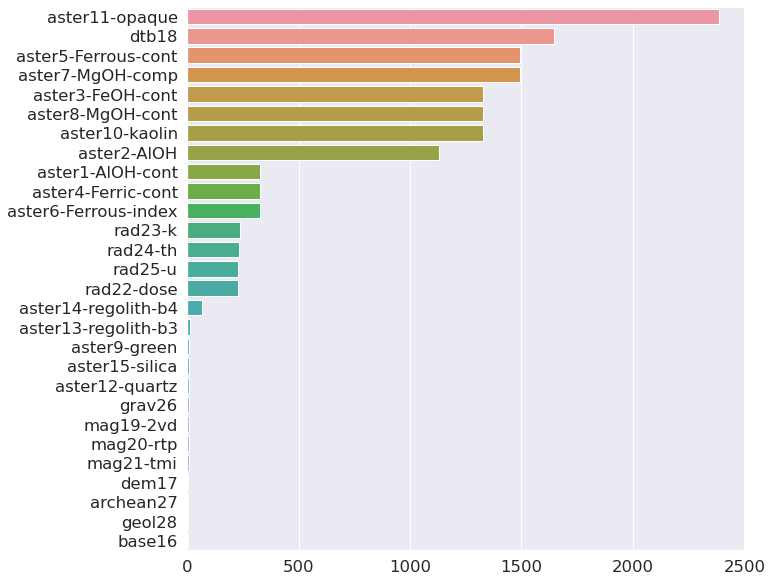

In [9]:
#Plot the missingness with Seaborn
f, ax = plt.subplots(figsize = (10, 10))
sns.barplot(missingNo.values, missingNo.index, ax = ax);

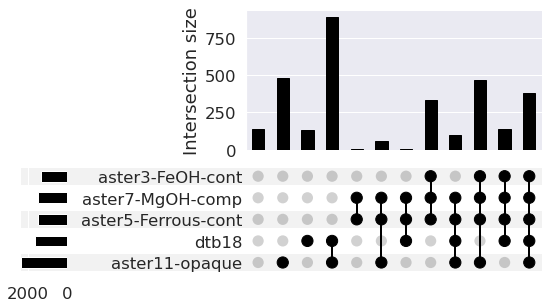

In [10]:
# Use upsetplot to see where missing values occur
# together
# Only use the top 5 columns
missing_cols = missingNo.index[:5].tolist()
missing_counts = (df.loc[:, missing_cols]
                  .isnull()
                  .groupby(missing_cols)
                  .size())

upsetplot.plot(missing_counts);

Why is this useful to know? Can our future data analysis deal with mising data?

## Explore the data to see whether there are any unusual relationships between variables 

#### Pull out numeric and categoric variables:

1. What data types do I have in my data? Can I infer that some of them are categorical, and others are not?

In [11]:
df.dtypes.value_counts()

float64    34
object      2
int64       2
dtype: int64

2. Pull out the categorical and numerical variables

In [12]:
numericVars = df.select_dtypes(exclude = ['int64','object']).columns
catVars = df.select_dtypes(include = ['object']).columns

3. Plot the first 11 numerical variables, and their relationship with whether deposit information.

In [13]:
df.shape

(3138, 38)

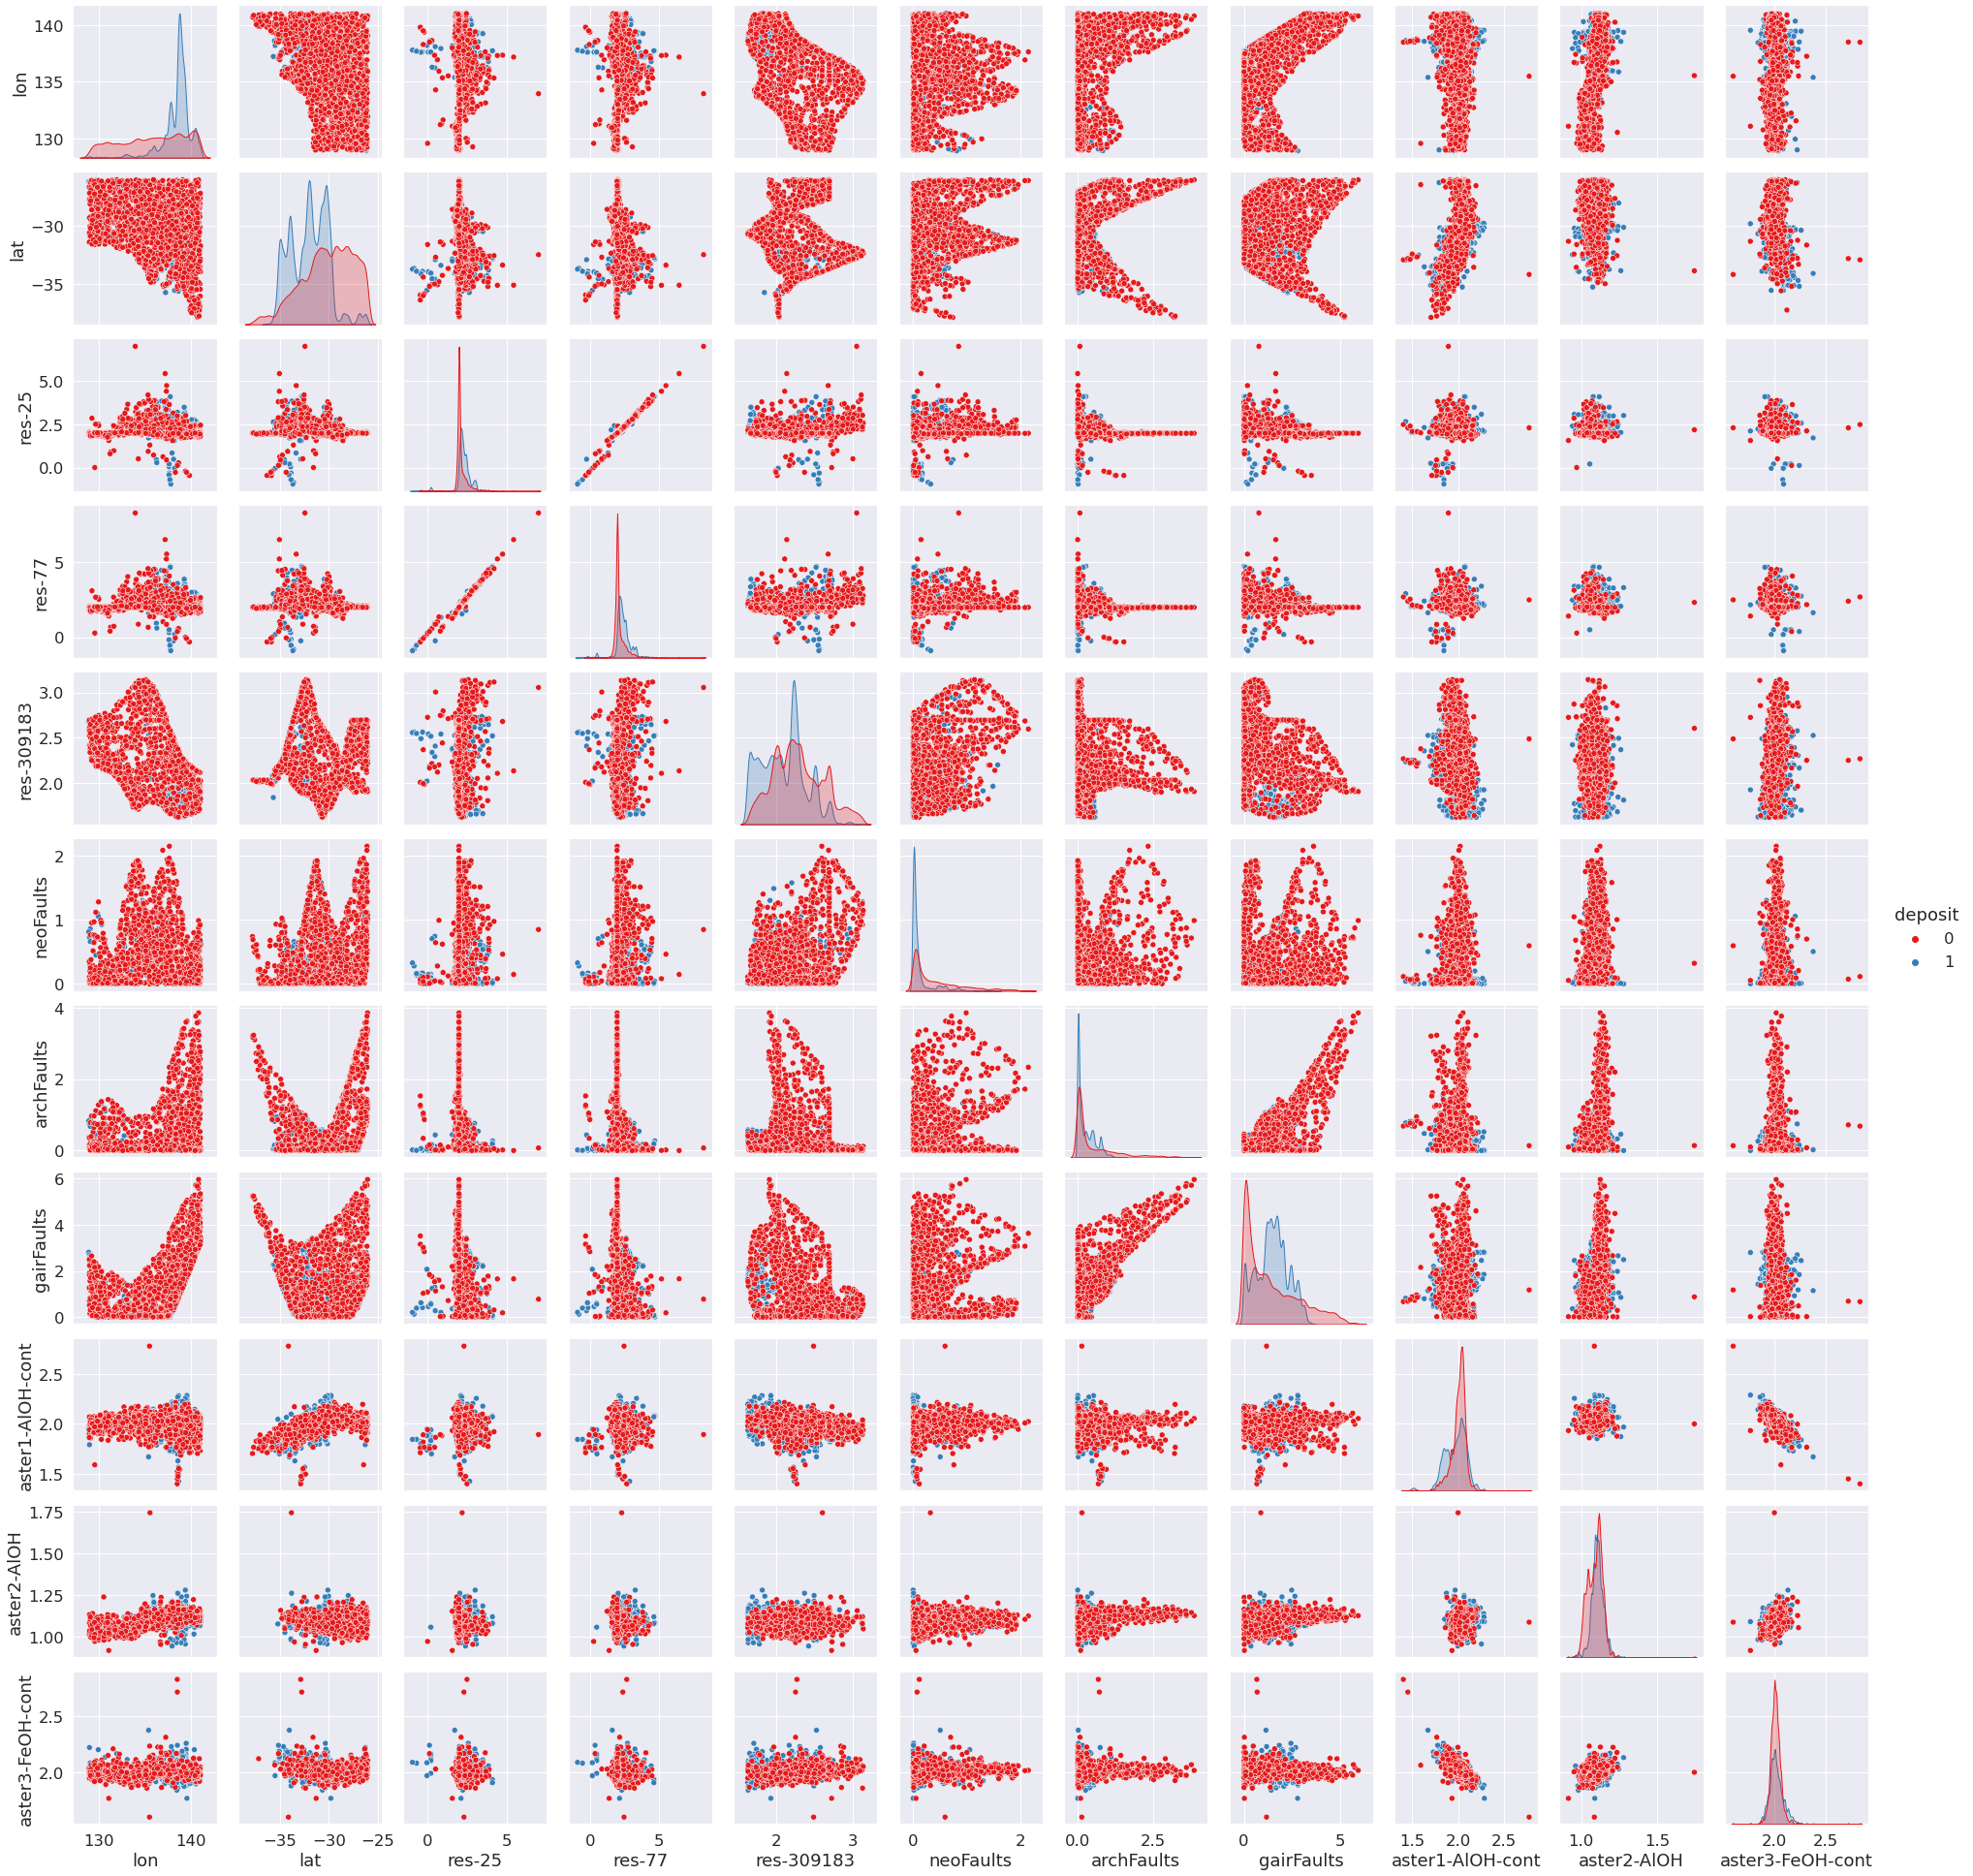

In [14]:
#Select which columns to plot (all of them are too many), and be sure to include the "deposit" variable
cols = [np.append(np.arange(0, 11), 37)]
#Make a pairwise plot to find all the relationships in the data
sns.pairplot(df[df.columns[cols].tolist()[0]],hue ="deposit",palette="Set1",diag_kind="kde",diag_kws={'bw': 0.1})

<div class="challenge">

### Challenge

What variables are the most correlated? Hint: pandas has a function to find e.g. "pearson" corrrelations.

<details>
<summary>Solution</summary>

```python
df.corr()
    
#Or pick a variable that you want to sort by. And round out the sig figs.
#df.corr().round(2).sort_values('dem17', ascending = False)
```

   
</details>
</div>

But, no need to dig through a table! We can plot the relationships.

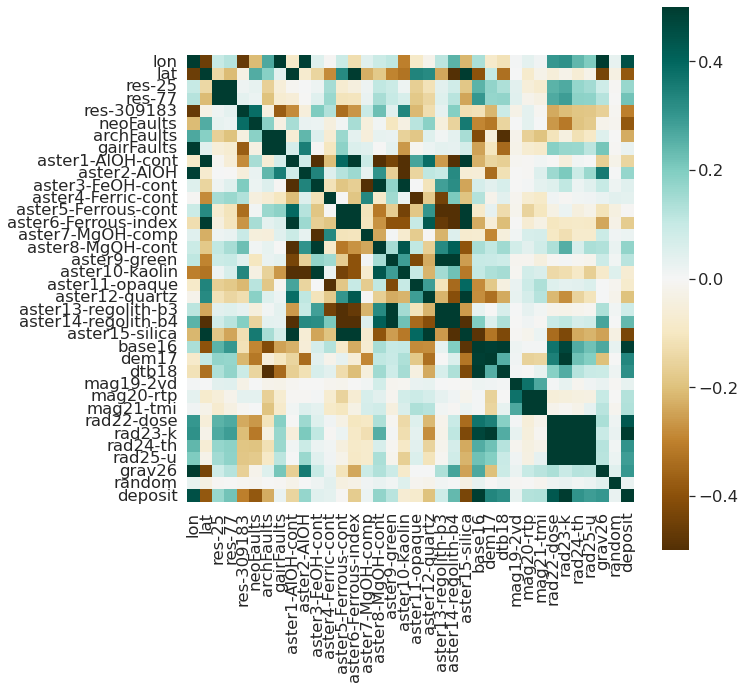

In [15]:
corr = df.corr() 

# Draw the heatmap with the mask and correct aspect ratio
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr,
            cmap=plt.cm.BrBG, 
            vmin=-0.5, vmax=0.5, 
            square=True,
            xticklabels=True, yticklabels=True,
            ax=ax);

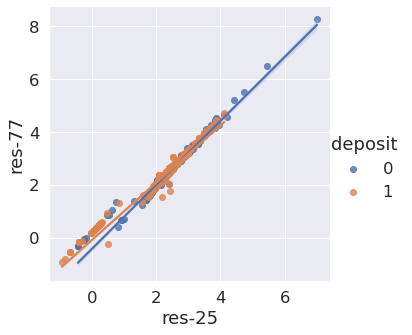

In [16]:
#Plot a regression model through the data
sns.lmplot(
    data = df,
    x = 'res-25', y = 'res-77',hue='deposit'
);

<div class="keypoints">

### Key points
- EDA is the first step of any analysis, and often very time consuming.
- Skipping EDA can result in substantial issues with subsequent analysis.
<div>

<div class="questions">

### Questions:
- What is the first step of any ML project (and often the most time consuming)?
</div>

